# The dataset

We will explore regression models using a standard bencharking dataset, the AMES Housing data. This comprises data about individual housing property in AMES, Iowa, USA, from 2006-2010. More information on the data set can be found here: 
Dataset description -  http://jse.amstat.org/v19n3/decock.pdf
Dataset documentation http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
The actual dataset in text, tab-separated format: http://jse.amstat.org/v19n3/decock/AmesHousing.txt

In [1]:
import pandas as pd

We will not use the complete set of attributes in the dataset but we will downselect specific ones: 

Overall Qual (Ordinal): Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
Overall Cond (Ordinal): Rates the overall condition of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor 
       
Gr Liv Area (Continuous): Above grade (ground) living area square feet

entral Air (Nominal): Central air conditioning
       N	No
       Y	Yes

total Bsmt SF (Continuous): Total square feet of basement area

SalePrice (Continuous): Sale price in $$

In [2]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [3]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',sep='\t',usecols=columns)

We can also read the data set locally

In [15]:
df = pd.read_csv('AmesHousing.txt',sep='\t',usecols=columns)

Let's inspect the first 5 lines of the dataframe populated with the data

In [16]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


All attributes above are numerical, apart from Central Air

Let's inspect also the shape / dimensions of the dataset

In [17]:
df.shape

(2930, 6)

We can convert the Central Air varariable to a numerical one by mapping 'N' values to 0 and 'Y' values to 1 and inspect the data again.

In [4]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [19]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


Before progressing any further, let's check for missing values using the isnull() method of the dataframe

In [20]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

We have counted '1' missing value in the Total Bsmt SF attribute. As this is in just one record, the simplest approach without sacrificing much information from the dataset is to remove this record. We will use a method which drops "non a number" records. 

In [5]:
df = df.dropna(axis=0)

In [22]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

Good - no missing values any more

# Applying k-NN Regression

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)
# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsRegressor

you may use pip install 
in CMD (command prompt) to install the above libraries if they are not already installed
pip install seaborn

In [10]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [11]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

mae: 26183.05119453925
mse: 1354101655.8703072
rmse: 36798.120276317204
0.9955134575990723
0.7781877039785317


In [12]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

mae: 21746.718998862343
mse: 931300879.0838075
rmse: 30517.222663338933
0.9071820456176508
0.847445732467093


In [13]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

mae: 21224.225255972695
mse: 951653275.200182
rmse: 30848.878021739816
0.8832082277368681
0.8441118529961238


In [14]:
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

mae: 20812.990573703883
mse: 954456584.8681713
rmse: 30894.280779266755
0.8760586485664408
0.8436526492493296


Note: the default reported score is the R2

Finding the best k for k-NN regression

In [15]:
error = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

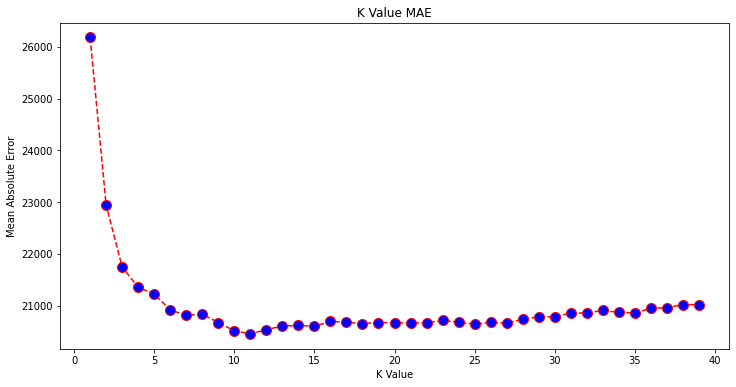

In [16]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

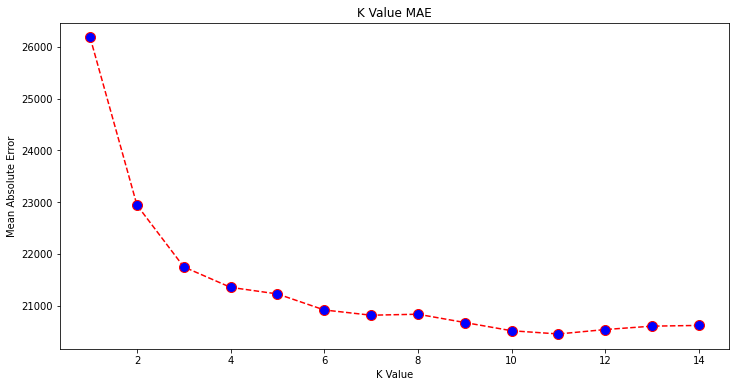

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [18]:
import numpy as np 
print(min(error))             
print(np.array(error).argmin()) 

20450.221946426722
10


# k-fold cross-validation

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [20]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [21]:
knr_model = KNeighborsRegressor(n_neighbors=7)
knr_model.fit(X_train, y_train)
y_pred = knr.predict(X_test)
scores = cross_val_score(knr_model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print(scores)
#k-fold_score = averages(scores)
#print(k-fold_score)
#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
#print(f'mae: {mae}')
#print(f'mse: {mse}')
#print(f'rmse: {rmse}')
#print(knr.score(X_train, y_train))
#print(knr.score(X_test, y_test))

[-39966.0858118  -39771.71574842 -41851.34032179 -40420.66504144
 -43542.93089133]


In [22]:
print(np.average(scores))

-41110.54756295656


Above you see the average score (negative of mean absolute error) over the k-folds

In [23]:
scores = cross_val_score(knr_model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print(scores)
print(np.average(scores))

[-3.66597906e+09 -3.12430051e+09 -3.63675903e+09 -3.27489870e+09
 -4.09482507e+09]
-3559352473.3249755


In [24]:
scores = cross_val_score(knr_model, X, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)
print(scores)
print(np.average(scores))

[-60547.32907057 -55895.44268666 -60305.54728995 -57226.73059902
 -63990.82017692]
-59593.17396462259
